### Import Libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
print('Using Tensorflow version', tf.__version__)

Using Tensorflow version 2.17.0


### Split into Training and Testing Datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Convert Encoded Labels into Categories

In [34]:

def label_to_desc(label):
    if label == 0:
        desc = 'T-Shirt/Top'
    elif label == 1:
        desc = 'Trouser'
    elif label == 2:
        desc = 'Pullover'
    elif label == 3:
        desc = 'Dress'
    elif label == 4:
        desc = 'Coat'
    elif label == 5:
        desc = 'Sandal'
    elif label == 6:
        desc = 'Shirt'
    elif label == 7:
        desc = 'Sneaker'
    elif label == 8:
        desc = 'Bag'
    elif label == 9:
        desc = 'Ankle Boot'
    
    return desc

### Check Shape of Data

In [3]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [12]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### View Example Image

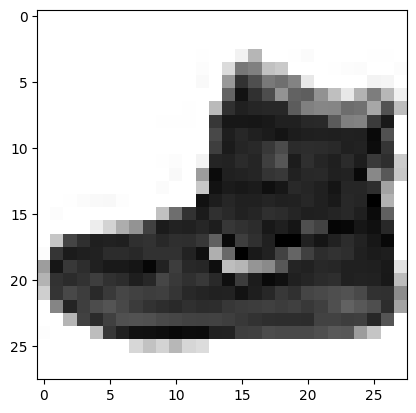

9
Ankle Boot


In [ ]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

print(y_train[0])
print(label_to_desc(y_train[0]))

### Encode Labels

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [19]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [20]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

### Reshape Data

In [ ]:
x_train_reshaped = np.reshape(x_train, (60000, (28*28)))
x_test_reshaped = np.reshape(x_test, (10000, (28*28)))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_train_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_train_reshaped shape:  (10000, 784)


In [23]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 4, 6, 7, 10, 12, 13, 15, 18, 23, 29, 35, 36, 40, 41, 44, 48, 52, 54, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 72, 73, 74, 75, 77, 80, 82, 88, 92, 98, 99, 102, 106, 107, 109, 115, 117, 119, 121, 122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155, 156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 255}


### Data Normalization

In [24]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon) # adding epsilon to account for possible instability 
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon) # standard practice, do same pre-processing, don't need to recalculate - it might cause bias

In [25]:
print(set(x_train_norm[0]))

{-0.8102576563304191, -0.7769321664663864, -0.4103517779620258, 0.7004978841724001, 1.4558756544238098, 1.1448377490261705, 1.8002390496854819, 1.5003096409091867, 1.1004037625407934, 1.722479573336072, 1.5225266341518753, 1.3781161780744, 1.9002155192775803, 2.022408982112367, 1.6225031037439737, 0.9004508233565968, -0.12153086580707505, 1.2225972253755804, 1.7446965665787606, 1.8668900294135473, 0.011771093649056062, 1.466984151045154, 1.3447906882103673, -0.19929034215648486, -0.06598838270035376, 1.0670782726767607, 1.589177613879941, 1.7113710767147277, 1.1892717355115476, 1.8335645395495146, 1.3114651983463343, 0.911559319977941, 1.4336586611811213, 1.9557580023843015, 0.5116534416095477, 1.5558521240159082, 1.678045586850695, 1.1559462456475147, 1.033752782812728, -0.010445899593632457, 0.2783750125613183, 0.48943644836685923, -0.4881112543114356, -0.27704981850589466, 0.4672194551241707, 1.2781397084823016, 1.9224325125202686, -0.3548092948553045, -0.6103047171462225, 1.4003331

### Create Model

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)), # hidden layer 
    Dense(128, activation='relu'), # second hidden layer
    Dense(128, activation='relu'), # third hidden layer
    Dense(128, activation='relu'), # fourth hidden layer 
    Dense(10, activation='softmax') # output layer 
])

c:\Users\Zero\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [27]:
model.compile(
    optimizer = 'sgd', # stocastic gradient descent - decrease loss function
    loss = 'categorical_crossentropy', # difference between predicted output and actual output
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [28]:
model.fit(x_train_norm, y_train_encoded, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7509 - loss: 0.7303
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.8534 - loss: 0.4089
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.8665 - loss: 0.3643
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.8769 - loss: 0.3450
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.8832 - loss: 0.3229
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.8877 - loss: 0.3084
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8915 - loss: 0.2975
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8952 - loss: 0.2893
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.8997 - loss: 0.2744
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9024 - loss: 0.2635


### Evaluating the Model

In [29]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy: ', accuracy * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8791 - loss: 0.3400
Test set accuracy:  88.05000185966492


### Predictions on Test Set

In [30]:
preds = model.predict(x_test_norm)
print('Shape of preds: ', preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
Shape of preds:  (10000, 10)


### View Predictions for Images

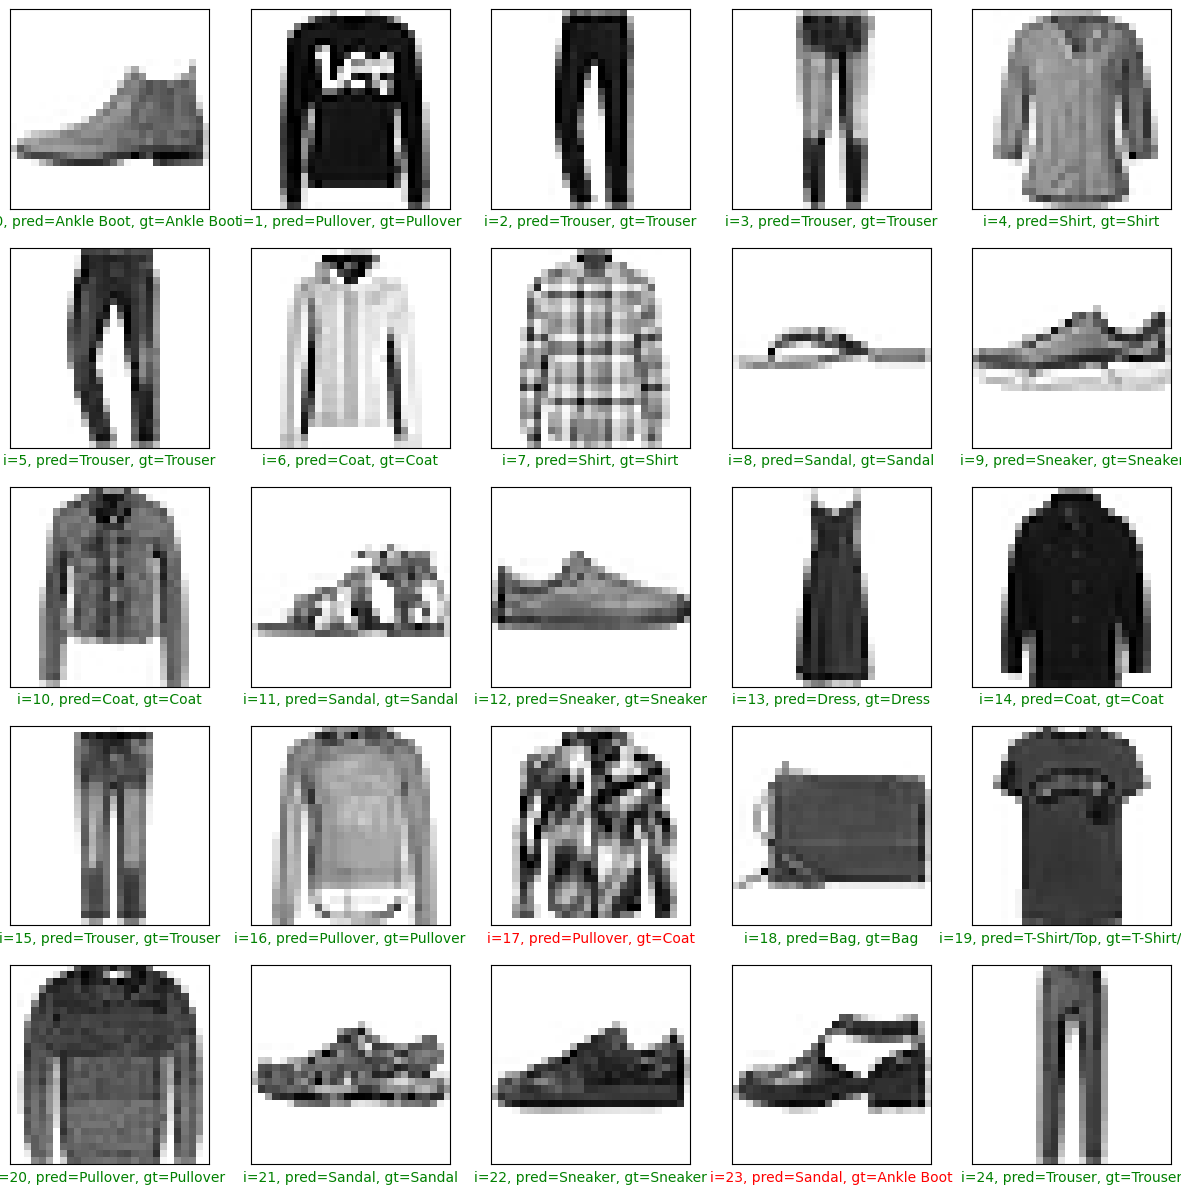

In [36]:
plt.figure(figsize=(15,15))
start_index = 0

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index + i])
    gt = y_test[start_index+i] # ground truth
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, label_to_desc(pred), label_to_desc(gt)), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')

### Check Options for Incorrect Prediction 

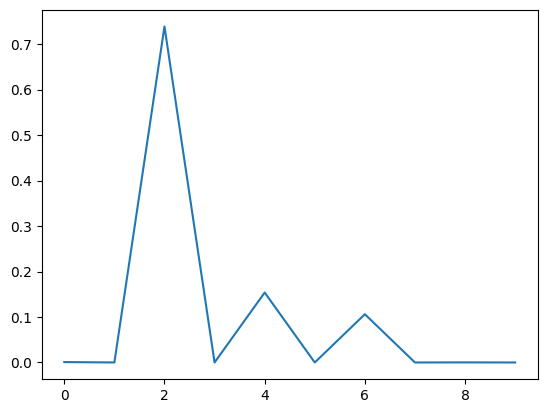

In [37]:
plt.plot(preds[17])
plt.show()